# Ford GoBike Data Analysis - I
## by Simeon Ante

## Introduction

The Ford Gobike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for February 2019. 
The dataset contains information about each ride distance, location and duration (start_time, start_station, end_time, end_station) as well as information about the user (gender, age, type of user).

In this notebook, I would work you through the process of analysing and visualizing this data.


## Preliminary Wrangling


In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [28]:
#load the Ford Gobike dataset into the notebook
df = pd.read_csv('ford_bike_trip.csv')

#duplicate my data
df_duplicate = df.copy()

In [29]:
#Preview and assess the dataset
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [30]:
#Further assessment
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Observation from Assessment
After assessing the dataset, I observed the folloiwng: 

1. The time variables in this dataset are all in the string datatype. I would convert them to the datetime datatype before analysis.
2. The time variables can be broken down into time of day(Morning, afternoon, evening) and day of the week. This is because i would like to see the most active periods.
3. The dataset provides membership birth year. I would use this to calculate the users' age to understand how age affects the rides.

### What is the structure of your dataset?

> The ford gobike dataset consists of 183412 rows × 16 columns. In the other words, each of the 183412 observations has been described by 16 variables.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out where and when the most trips occur. 
> I would also like to know how the major characteristics of their users (Age, gender, type of user), relate to the most popular trip start times and location.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that would support my investigations are: duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, user_type, member_birth_year, member_gender

### Cleaning the data
At this point, i would clean work on the observations I made during the assesment stage.

In [31]:
#Change the datatype of time variables to date-time datatype
df['start_time'] = df['start_time'].astype('datetime64[s]')
df['end_time'] = df['end_time'].astype('datetime64[s]')


In [32]:
#Break down the time variables into date and time
df['start_date'] = pd.to_datetime(df['start_time']).dt.date

df['start_day'] = df['start_time'].dt.day_name()
df['end_date'] = pd.to_datetime(df['end_time']).dt.date

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,end_date
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,Thursday,2019-03-01
1,42521,2019-02-28 18:53:21,2019-03-01 06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,Thursday,2019-03-01
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,Thursday,2019-03-01
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,Thursday,2019-03-01
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,Thursday,2019-03-01


In [33]:
#Drop date part in start_time and end_time columns
df['start_time'] = pd.to_datetime(df['start_time']).dt.time

df['end_time'] = pd.to_datetime(df['end_time']).dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_date                 183412 non-null object
start_day                  183412 

In [34]:
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['day_period'] = 'morning'
df['day_period'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['day_period'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'
df.drop('start_hour',axis=1,inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,end_date,day_period
0,52185,17:32:10,08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,Thursday,2019-03-01,afternoon
1,42521,18:53:21,06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2019-02-28,Thursday,2019-03-01,night
2,61854,12:13:13,05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,Thursday,2019-03-01,afternoon
3,36490,17:54:26,04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,Thursday,2019-03-01,afternoon
4,1585,23:54:18,00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,Thursday,2019-03-01,night


In [35]:
#Getting Users age
df['age'] = df['member_birth_year'].apply(lambda x: 2017 - x)


In [36]:
#replace null gender values with 'other'
df['member_gender'].fillna('Other', inplace = True)

#convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'day_period': ['morning', 'afternoon', 'night'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                    'member_gender': ['Male','Female','Other']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [37]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other      11917
Name: member_gender, dtype: int64

In [38]:
col = list(df.columns)
print(col)

['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'start_date', 'start_day', 'end_date', 'day_period', 'age']


In [39]:
df = df[['start_date','start_day', 'start_time','day_period', 'end_date','end_time','duration_sec', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year','age', 'member_gender', 'bike_share_for_all_trip']]
df.head(5)

,start_date,start_day,start_time,day_period,end_date,end_time,duration_sec,start_station_id,start_station_name,start_station_latitude,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,2019-02-28,Thursday,17:32:10,afternoon,2019-03-01,08:01:55,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,33.0,Male,No
1,2019-02-28,Thursday,18:53:21,night,2019-03-01,06:42:03,42521,23.0,The Embarcadero at Steuart St,37.791464,...,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,Other,No
2,2019-02-28,Thursday,12:13:13,afternoon,2019-03-01,05:24:08,61854,86.0,Market St at Dolores St,37.769305,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,45.0,Male,No
3,2019-02-28,Thursday,17:54:26,afternoon,2019-03-01,04:02:36,36490,375.0,Grove St at Masonic Ave,37.774836,...,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,28.0,Other,No
4,2019-02-28,Thursday,23:54:18,night,2019-03-01,00:20:44,1585,7.0,Frank H Ogawa Plaza,37.804562,...,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,43.0,Male,Yes


In [40]:
#Finally, I will drop columns that would not be necessary for my analysis
todrop = ['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'bike_share_for_all_trip']
df.drop(todrop, axis=1, inplace=True)
df.head()

,start_date,start_day,start_time,day_period,end_date,end_time,duration_sec,user_type,member_birth_year,age,member_gender
0,2019-02-28,Thursday,17:32:10,afternoon,2019-03-01,08:01:55,52185,Customer,1984.0,33.0,Male
1,2019-02-28,Thursday,18:53:21,night,2019-03-01,06:42:03,42521,Customer,NaN,NaN,Other
2,2019-02-28,Thursday,12:13:13,afternoon,2019-03-01,05:24:08,61854,Customer,1972.0,45.0,Male
3,2019-02-28,Thursday,17:54:26,afternoon,2019-03-01,04:02:36,36490,Subscriber,1989.0,28.0,Other
4,2019-02-28,Thursday,23:54:18,night,2019-03-01,00:20:44,1585,Subscriber,1974.0,43.0,Male


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Let's begin by finding out the frequency of trips based on the day of the week.
Since this visual would show one categorical data (day) against quantitative (frequency), I'll go with a barchart.


In [56]:
#function to formatplots and set default color
def plotlabels(xL,yL,title):
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(xL, fontsize=10, weight='bold')
    plt.ylabel(yL, fontsize=10, weight='bold')
    color='#2E5984'
    
def mycolor():
    color='#2E5984'
    return color
    


Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64


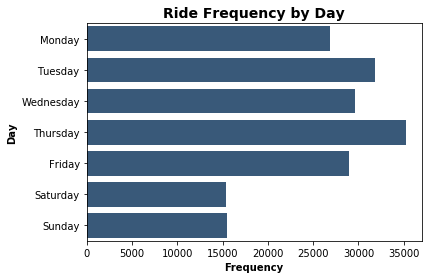

In [53]:
print(df['start_day'].value_counts())

sb.countplot(data=df, y='start_day', color=mycolor())
plotlabels('Frequency','Day', 'Ride Frequency by Day')

The barchart shows that the frequency of rides started was between 35197(thursday) and 26852(Monday) for weekdays. During the weekends however, the frequency drops significantly to 15523(sunday) and 15405(saturday).
I will now check to see if this drop is as a result of fewer weekends than weekdays or if there is a different reason for the drop.

In [17]:
df.groupby('start_day')['start_date'].nunique()

start_day
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Saturday     4
Sunday       4
Name: start_date, dtype: int64

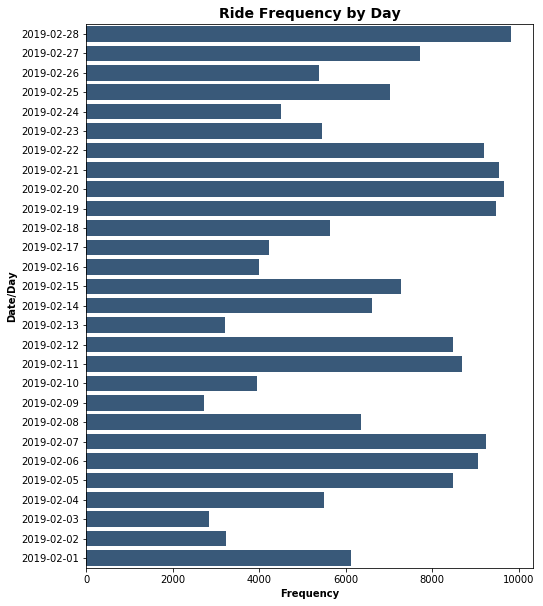

In [54]:
plt.figure(figsize=[8,10])
sb.countplot(data=df, y='start_date', color=mycolor())

plotlabels('Frequency','Date/Day', 'Ride Frequency by Day')
#I tried to set the date and day as the yticknames to no avail


This result shows that each week day occurred four times throughout this month. This means that the drop in frequency was not caused by fewer weekends in the month. The bar chart shows that the number of rides on saturdays and sundays are particularly lower.
I would carry out further analysis to find out what the fewer ride frequency during the weekeneds mean.

What time period had the most rides on each day? Are the periods different for weekdays and weekends?

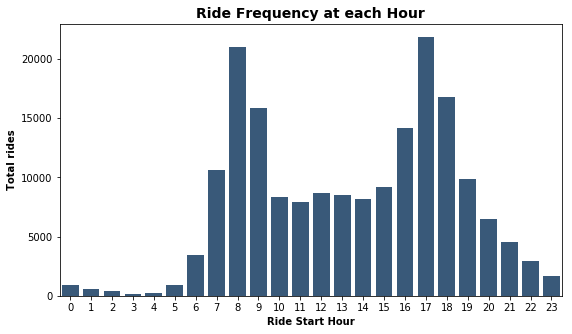

In [55]:
# plot distribution of day of week
plt.figure(figsize=[9, 5])
sb.countplot(data =df, x= df['start_time'].apply(lambda time: time.hour), color=mycolor());

plotlabels('Ride Start Hour','Total rides', 'Ride Frequency at each Hour')

In [20]:
df.groupby(['start_day']).agg({'day_period': pd.Series.mode})

,,day_period
start_day,,
Monday,0,morning
Tuesday,0,morning
Wednesday,0,morning
Thursday,0,morning
Friday,0,morning
Saturday,0,afternoon
Sunday,0,afternoon


The chart shows that the ride frequency peaks at 8.00am and 5.00pm. This is generally the resumption and closing time period. 
This finding also correlates with my suspicion described above.

Further analysis has shown that during weekdays, there are more rides in the morning while the weekends have more afternoon rides.

My initial assumption is that most rides during the weekdays are taken by users who use the bikes to get to work while most users use the bikes during the weekends for leisure. 

Next, I would like to know more about the users and see how they relate to the ride frequency on different days.
Do the customers or subscribers form majority of users on the weekdays or weekends?
I'll start by looking at the age distribution of the users

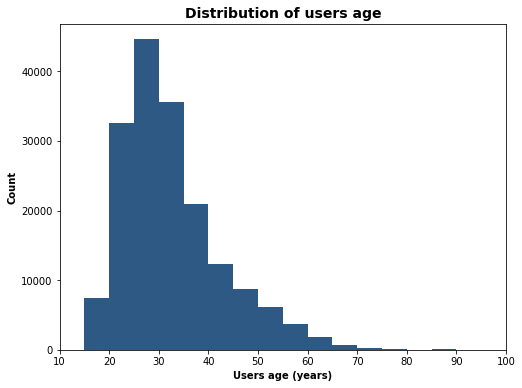

In [57]:
binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])

#I have to select rows that contain non-null age values
plt.hist(data = df[df['age'].notnull()], x = 'age', bins=bins, color=mycolor())

plotlabels('Users age (years)','Count', 'Distribution of users age')

plt.xlim(10,100)
plt.show()


The initial histogram shows that most of the users fall around 30 years. However,  i observed that there are users between 90 - 140 years. These are very high values and would most likely be a pointer to errors.

Next I will look at the gender and user type distribution.

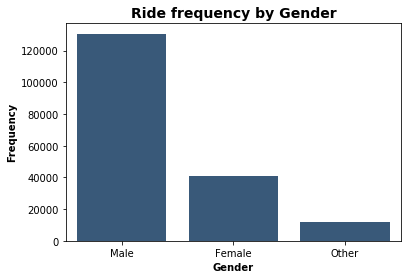

In [58]:
#Plotting a bar chart of ride frequency by gender

sb.countplot(data=df, x='member_gender', color=mycolor())
plotlabels('Gender','Frequency', 'Ride frequency by Gender')

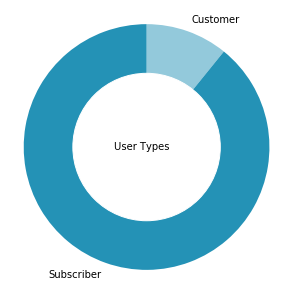

In [59]:
type_color = sb.color_palette("ocean_r")

#User type
plt.figure(figsize=[5,5])
type_count = df['user_type'].value_counts().sort_values(ascending=True)
plt.pie(type_count, labels=type_count.index, startangle=90, counterclock=False,colors=type_color, wedgeprops = {'linewidth': 10})
plt.axis('square')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
p.text(0.5, 0.5, 'User Types', va = 'center', ha = 'center');

In [24]:
# summary of ride frequency by gender and user type
user_type_count = (df['user_type'].value_counts()/df['user_type'].count())*100
member_gender_count = (df['member_gender'].value_counts()/df['member_gender'].count())*100

print("User Types Percentage Count (%)")
display(user_type_count.round(2).sort_values(ascending=False));
print("\nMember Gender Percentage Count (%)")
display(member_gender_count.round(2).sort_values(ascending=False));


User Types Percentage Count (%)


Subscriber    89.17
Customer      10.83
Name: user_type, dtype: float64


Member Gender Percentage Count (%)


Male      71.23
Female    22.27
Other      6.50
Name: member_gender, dtype: float64

In [25]:
df[df['age'] > 80].sort_values('age')

,start_date,start_day,start_time,day_period,end_date,end_time,duration_sec,user_type,member_birth_year,age,member_gender
44164,2019-02-22,Friday,15:22:51,afternoon,2019-02-22,15:29:10,379,Customer,1934.0,83.0,Male
52049,2019-02-21,Thursday,17:34:59,afternoon,2019-02-21,17:41:18,378,Customer,1934.0,83.0,Male
145215,2019-02-07,Thursday,09:59:33,morning,2019-02-07,10:08:03,509,Subscriber,1933.0,84.0,Female
62611,2019-02-20,Wednesday,16:46:17,afternoon,2019-02-20,16:49:49,212,Subscriber,1933.0,84.0,Female
144039,2019-02-07,Thursday,13:24:05,afternoon,2019-02-07,13:30:23,378,Subscriber,1933.0,84.0,Female
122172,2019-02-11,Monday,12:41:30,afternoon,2019-02-11,12:51:31,601,Subscriber,1933.0,84.0,Female
55495,2019-02-21,Thursday,09:58:18,morning,2019-02-21,10:11:02,764,Subscriber,1933.0,84.0,Female
54102,2019-02-21,Thursday,13:49:43,afternoon,2019-02-21,13:55:43,360,Subscriber,1933.0,84.0,Female
54054,2019-02-21,Thursday,13:58:11,afternoon,2019-02-21,14:03:37,325,Subscriber,1933.0,84.0,Female
44409,2019-02-22,Friday,14:44:43,afternoon,2019-02-22,14:54:28,584,Subscriber,1933.0,84.0,Female


After looking through the data, I couldn't quite determine if these high age values was an error. However, since this doesn't really affect the questions I'm asking, I'll leave those rows (observations) in the dataset.

Finally, I would like to see the distribution of ride duration in the dataset.

In [26]:
df.sort_values('duration_sec')

,start_date,start_day,start_time,day_period,end_date,end_time,duration_sec,user_type,member_birth_year,age,member_gender
169882,2019-02-04,Monday,09:02:26,morning,2019-02-04,09:03:28,61,Subscriber,1994.0,23.0,Male
157305,2019-02-05,Tuesday,23:05:20,night,2019-02-05,23:06:21,61,Subscriber,1995.0,22.0,Male
103565,2019-02-14,Thursday,12:26:46,afternoon,2019-02-14,12:27:47,61,Subscriber,1999.0,18.0,Male
44787,2019-02-22,Friday,13:56:21,afternoon,2019-02-22,13:57:23,61,Subscriber,1931.0,86.0,Male
44301,2019-02-22,Friday,15:09:57,afternoon,2019-02-22,15:10:58,61,Subscriber,1989.0,28.0,Male
134955,2019-02-08,Friday,16:25:31,afternoon,2019-02-08,16:26:32,61,Subscriber,1976.0,41.0,Male
82564,2019-02-18,Monday,09:53:31,morning,2019-02-18,09:54:33,61,Subscriber,1990.0,27.0,Male
64088,2019-02-20,Wednesday,13:08:18,afternoon,2019-02-20,13:09:19,61,Subscriber,1931.0,86.0,Male
80047,2019-02-18,Monday,16:31:12,afternoon,2019-02-18,16:32:14,61,Subscriber,1931.0,86.0,Male
58992,2019-02-20,Wednesday,21:44:00,night,2019-02-20,21:45:01,61,Subscriber,1994.0,23.0,Male


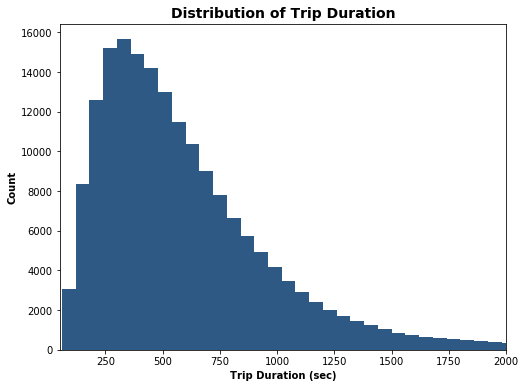

In [62]:
binsize = 60
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])

plt.hist(data = df, x ='duration_sec', bins=bins, color=mycolor)

#After plotting the histogram, I noticed some outliers so i have set limits for the x axis
plt.xlim(50, 2000)
plotlabels('Trip Duration (sec)','Count', 'Distribution of Trip Duration')

plt.show()

The distribution of ride duration is unimodal with a heavy skew to the right. The most frequent ride duration is about 350seconds (6 minutes). However, a few rides have durations as high as 85,400seconds. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I started out by looking at the number of rides for each day of the week throughout the month. I found out that more rides were taken on weekdays compared to weekends. I also confirmed that each day of the week had 4 instances throughout that month. 
further investigation showed that most rides during the weekdays start in the morning while during the weekend, most are taken in the afternoon. 
The frequency distribution also showed a bi-modal distribution with peaks around 8am and 5pm.
I would further investigate this to understand why the number of rides are lower during the weekends.


I found out that the average ride duration was around 730seconds (12minutes). I would like to see if ride duration correlates with age and if the user type or day period influences the ride duration.

The user age ranged from 16years to 139. The histogram showed a unimodal distribution with most of the users around 30years old.

There were at least 3 times more male users than female while subscribers made up almost 90% of the total users.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The age distribution looked unusual with very ages up to 139 years present. These high age valeus seem odd but I thought it was fair to let it be since they are valid. 

I changed the data types of date related variables to the appropriate ones. I also created features that are critical and important to my analysis. Features like 'start_day', 'start_hour', 'day_period', and 'user_age'. 

I as well dropped variables that weren't of interest in the dataset to tidy up the dataset for exploration.

## Bivariate Exploration

In this section, I will investigate the relationship between variables in pairs.

I would like to see if there is any correlation between the ride duration and users age

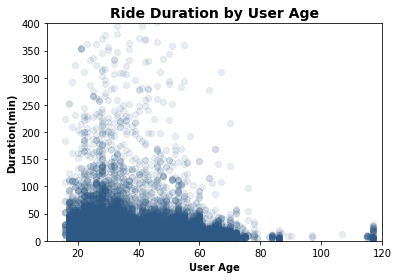

In [64]:
sb.regplot(data=df, x='age', y=df['duration_sec']/60, scatter_kws={'alpha': 0.1} ,color=mycolor, fit_reg=False)

plotlabels('User Age','Duration(min)', 'Ride Duration by User Age')
plt.xlim(10,120)
plt.ylim(0,400);

The graph doesn't show much of a relationship between the ride durations and users' age. However you can notice that the users with very high ages hardly ride for up to 50minutes which makes sense due to their age.

I would also like to see how the users' age and day period fare against each other.

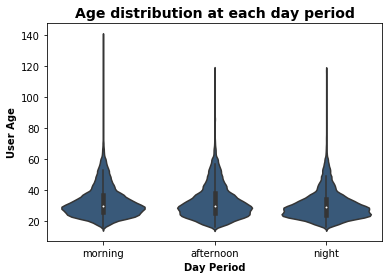

In [68]:
sb.violinplot(data=df, y='age', x='day_period' ,color=mycolor)

plotlabels('Day Period','User Age', 'Age distribution at each day period');

The violin plot shows that there's no relationship between the users' age and the period of day they decide to take a ride. However, I noticed that the user(s) with ages above 120 years only took rides in the morning. 

Next, I will look closer at the most frequent ride periods during weekdays and weekends.

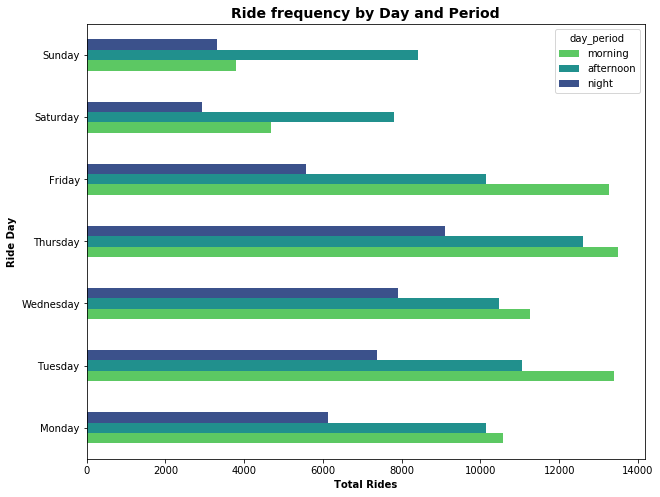

In [69]:
period_color = sb.color_palette('viridis_r', 3)
ride_period = df.groupby(['start_day', 'day_period']).size().unstack()
ride_period.plot(kind='barh', figsize=(10,8), color=period_color);

plotlabels('Total Rides','Ride Day', 'Ride frequency by Day and Period');

The chart shows that on weekdays, the morning rides are the most frequent. However, during the weekends the number of morning rides drop significantly and afternoon rides are more frequent. 

This finding is still consistent with my hypothesis that many users use the bike service to commute to and from their workplaces which is why the morning rides are less during the weekends.

In [31]:
df.groupby(['start_day','user_type']).agg({'start_date': 'count'})

start_date
start_day user_type             
Monday    Customer          2741
          Subscriber       24111
Tuesday   Customer          2606
          Subscriber       29207
Wednesday Customer          2466
          Subscriber       27175
Thursday  Customer          3390
          Subscriber       31807
Friday    Customer          3030
          Subscriber       25951
Saturday  Customer          2739
          Subscriber       12666
Sunday    Customer          2896
          Subscriber       12627

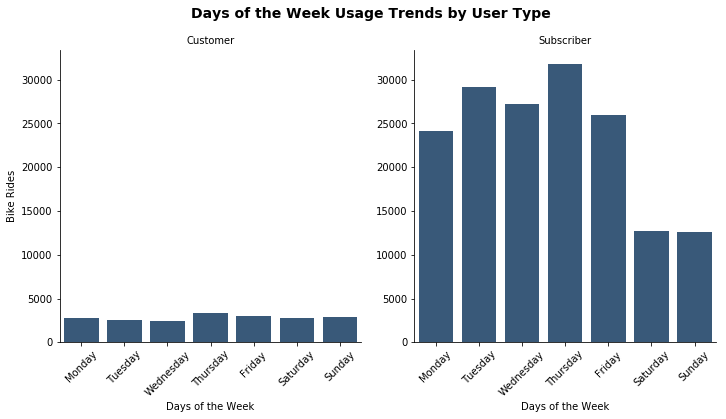

In [73]:
g = sb.FacetGrid(data=df, col="user_type", size=5);
g.map(sb.countplot, 'start_day', color = mycolor)

g.set_axis_labels("Days of the Week", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle('Days of the Week Usage Trends by User Type', y=1.05, fontsize=14, weight='bold');

In [33]:
#df.groupby(['start_day', 'user_type']).size().unstack().plot(kind='barh', color=['#fb8500','#023047','#219ebc'])

The graph graph shows that there are many more subscriber rides than customer rides which we already know. We also see that there are less subscriber rides during the weekends than the weekdays. The number of customer rides however, remain approximately the same throughout the week.


Finally, lets look at the average trip duration during the week. While the week days have more rides, it doesn't mean thse rides would have longer durations on average.  

In [75]:
df_avg_dur = df.groupby(['user_type','start_day']).duration_sec.mean().reset_index()
df_avg_dur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
user_type       14 non-null object
start_day       14 non-null category
duration_sec    14 non-null float64
dtypes: category(1), float64(1), object(1)
memory usage: 694.0+ bytes


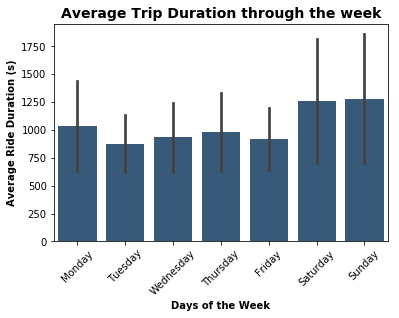

In [76]:

sb.barplot(data=df_avg_dur, x='start_day', y='duration_sec', color=mycolor);
plt.xticks(rotation = 45);
plotlabels('Days of the Week','Average Ride Duration (s)', 'Average Trip Duration through the week');

This chart shows that while the weekdays have more rides, the average trip duration is more during the weekends than the weekdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. After comparing the ride durations and users' age, I noticed no strong correlation between the features. However, the users with very high ages hardly ride for up to 50minutes which is expected due to their age.

2. I also noticed no relationship between the users' age and the period of day they decide to take a ride. However, I noticed that the user(s) with ages above 120 years only took rides in the morning. 

3. We already know that there are less rides during the weekends. After looking deeper, we notice that during the weekdays, the morning rides are most frequent. However, during the weekends the number of morning rides drop significantly and afternoon rides are more frequent. 

4. We see that there are less subscriber rides during the weekends than the weekdays. The number of customer rides however, remain approximately the same throughout the week.

5. Although the weekdays have more rides, the average trip duration is more during the weekends than the weekdays.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No. I did not notice any interesting relationship between other features.

## Multivariate Exploration

After looking at the average trip durations on each day of the week, I noticed the weekends have longer trip on average. I would now like to see how the user types and genders compare to each other.

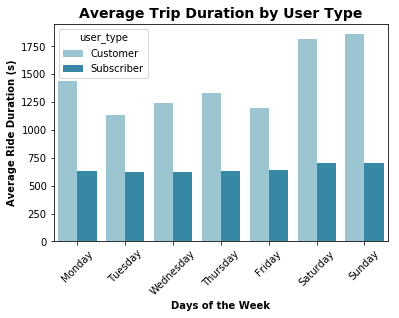

In [77]:
type_color = sb.color_palette("ocean_r")

sb.barplot(data=df_avg_dur, x='start_day', y='duration_sec', hue='user_type', palette=type_color);
plt.xticks(rotation = 45);
plotlabels('Days of the Week','Average Ride Duration (s)', 'Average Trip Duration by User Type');

The average trip duration remains approximately the same throughout the week for the subscribers. On the other hand, Customers have longer trips on average during the weekends.

Next, I will look at the difference in average trip duration by genders.

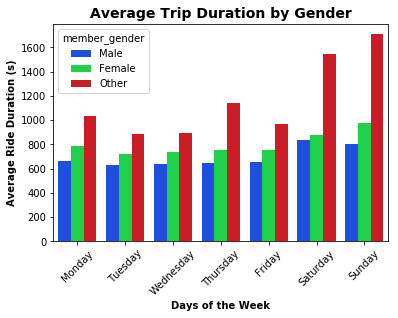

In [78]:
gender_color = sb.color_palette("bright")
df_gen_grouped = df.groupby(['member_gender','start_day']).duration_sec.mean().reset_index()
sb.barplot(data=df_gen_grouped, x='start_day', y='duration_sec', hue='member_gender', palette=gender_color);
plt.xticks(rotation = 45);
plotlabels('Days of the Week','Average Ride Duration (s)', 'Average Trip Duration by Gender');

Interestingly, the 'other' gender take longer trips on average throughout the week. Females also take longer trips on average compared to males. 

Finally, Lets see if the user type and age affects ride duration.

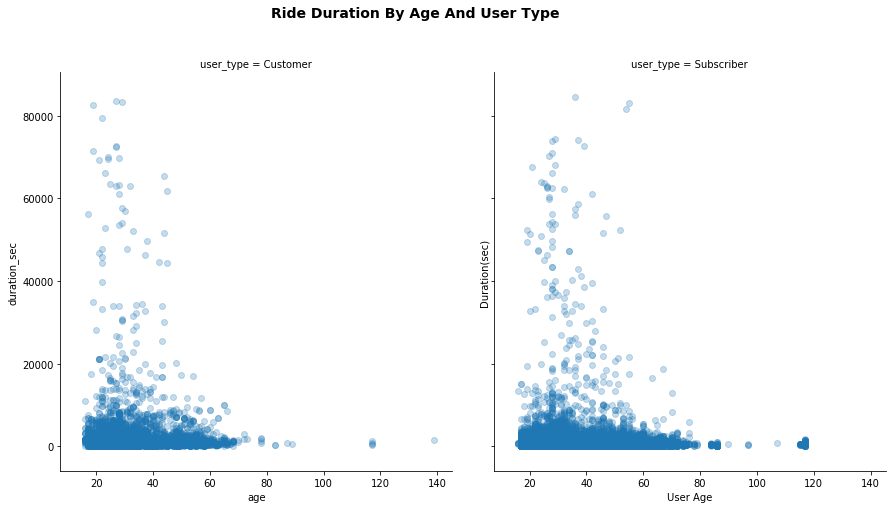

In [82]:
g=sb.FacetGrid(data=df, col='user_type', col_wrap=2)
g.map(plt.scatter,'age', 'duration_sec', alpha= 0.25)
plt.suptitle('Ride duration by Age and User Type'.title(), y=1,
            fontsize=14, weight='bold')
plt.ylabel('Duration(sec)')
plt.xlabel('User Age')
g.fig.set_size_inches(14,8);
plt.show();


There is no glaring relationship between the user age and ride duration while the subscribers have lower ride duration on average

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1. The average trip duration remains approximately the same throughout the week for the subscribers. On the other hand, Customers have longer trips on average during the weekends.

2. Interestingly, the 'other' gender take longer trips on average throughout the week. Females also take longer trips on average compared to males.

3. There is no glaring relationship between the user age and ride duration while the subscribers have lower ride duration on average.

### Were there any interesting or surprising interactions between features?

No. I did not notice any interesting relationship between other features.

## Conclusions

In conclusion. the trips in the sanfransisco bay area for february 2019 show that the bike share users ride more during the weekdays than the weekends. This may be as a result of users commuting to and from their workplaces. This hypothesis was backed up by the barchart showing the peak ride start times at 8am and 5pm which are typical resumption and closing time.

Next, we discovered that during the weekends, the customers take more rides than the subscribers. We also noticed that the most popular ride period was during the afternoons unlike during weekdays when rides were mostly in the mornings. 

We found out that the age of users and duration of rides had no correlation however, the customers took longer rides on average than the subscribers.

## References

1. https://stackoverflow.com/questions/55571311/get-part-of-day-morning-afternoon-evening-night-in-python-dataframe

2. https://stackoverflow.com/questions/32827169/python-reduce-precision-pandas-timestamp-dataframe

3. https://datascience.stackexchange.com/questions/77534/how-to-use-df-groupby-to-select-and-sum-specific-columns-w-o-pandas-trimming-t

4. https://www.google.com/search?q=%232E5984&rlz=1C1EJFC_enNG864NG864&oq=%232E5984&aqs=chrome..69i57.965j0j7&sourceid=chrome&ie=UTF-8        